1. Design model(input, output, forward pass)

2. construct loss and optimizer

3. Training loop
    - forward pass: compute prediction
    - backward pass: gradients
    - update weights


0. preparing data

1. model

2. optimizer

3. training loop

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [9]:
# 0 preparing data

X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

In [10]:
# 1 model

input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [11]:
# 2 optimizer

lr = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [12]:
# 3 training loop

nunm_epochs = 200
for epoch in range(nunm_epochs):
    # forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred, y)

    # backward pass
    loss.backward()

    # update
    optimizer.step()

    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


epoch: 10, loss = 4468.5117
epoch: 20, loss = 3333.0757
epoch: 30, loss = 2511.2405
epoch: 40, loss = 1915.7717
epoch: 50, loss = 1483.9027
epoch: 60, loss = 1170.4064
epoch: 70, loss = 942.6511
epoch: 80, loss = 777.0611
epoch: 90, loss = 656.5850
epoch: 100, loss = 568.8756
epoch: 110, loss = 504.9837
epoch: 120, loss = 458.4166
epoch: 130, loss = 424.4601
epoch: 140, loss = 399.6879
epoch: 150, loss = 381.6086
epoch: 160, loss = 368.4088
epoch: 170, loss = 358.7684
epoch: 180, loss = 351.7253
epoch: 190, loss = 346.5786
epoch: 200, loss = 342.8163


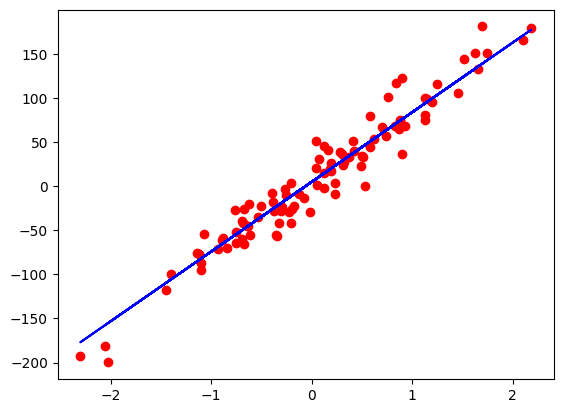

In [13]:
# plot
pred = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, pred, 'b')
plt.show()